# Import and setting

In [1]:
!pwd

/Users/ywfang/FANG/git/readingnotes/abinitio/CrySPY


In [1]:
# ---------- for python2
from __future__ import print_function
from __future__ import division

In [2]:
# ---------- import
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
# ---------- setting for plot
plt.rcParams['pdf.fonttype'] = 42 # embed fonts in PDF using type42 (True type)

In [4]:
# ---------- If you don't use seaborn, comment out this cell
import seaborn as sns
sns.set_style('whitegrid', {'axes.edgecolor': 'black', 'axes.linewidth': 1.5})
sns.set_context('talk', font_scale=2.0)
#sns.set_palette('deep')
sns.set_palette("dark")

# Data

In [20]:
def load_rslt():
    with open('./pkl_data/rslt_data.pkl', 'rb') as rdata:
        rslt_data = pickle.load(rdata, encoding='latin1')  # encoding='latin1' was added by fang
    return rslt_data


In [9]:
!ls pkl_data

RS_id_data.pkl      kpt_data.pkl        rslt_data.pkl
init_struc_data.pkl opt_struc_data.pkl


In [16]:
rslt_data = load_rslt()

# ---------- sort by Energy
rslt_data.sort_values(by=['Energy']).head(10)

,Struc_ID,Spg_num,Spg_sym,Spg_num_opt,Spg_sym_opt,Energy,Magmom,Opt
19,19,198,P2_13,227,Fd-3m,-43.3685,NaN,done
8,8,230,Ia-3d,230,Ia-3d,-41.0957,NaN,done
18,18,25,Pmm2,139,I4/mmm,-41.0919,NaN,done
1,0,5,C2,191,P6/mmm,-40.9852,NaN,done
10,10,221,Pm-3m,221,Pm-3m,-40.7628,NaN,done
9,9,51,Pmma,221,Pm-3m,-40.76,NaN,done
17,17,155,R32,166,R-3m,-40.7581,NaN,not_yet
7,7,4,P2_1,11,P2_1/m,-40.7362,NaN,done
3,2,87,I4/m,221,Pm-3m,-40.7281,NaN,done
15,15,96,P4_32_12,221,Pm-3m,-40.6969,NaN,done


In [17]:
# ---------- Number of structures
ndata = len(rslt_data)
print('Number of data: {}'.format(ndata))

# ---------- check success and error
nsuccess = rslt_data['Energy'].count()
nerror = ndata - nsuccess
print('Success: {}'.format(nsuccess))
print('Error: {}'.format(nerror))

# ---------- minimum
Emin = rslt_data['Energy'].min()
print('Emin: {} eV'.format(Emin))

# ---------- magmom (absolute value)
magmom = np.abs(rslt_data['Magmom'])
magmax = magmom.max()

Number of data: 20
Success: 19
Error: 1
Emin: -43.368533 eV


# Energy vs. trial

Text(0,0.5,'Energy (eV/cell)')

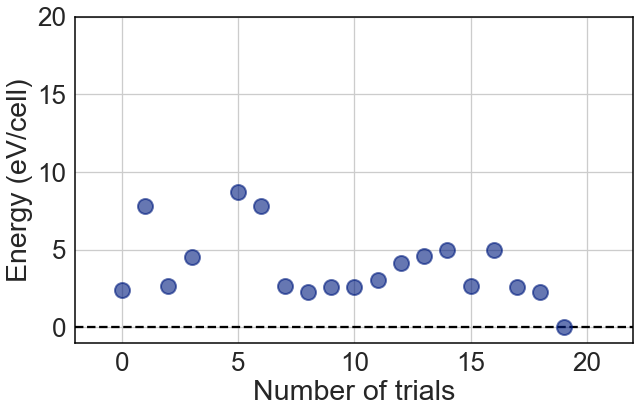

In [18]:
# ---------- figure
plt.figure(figsize=(10, 6))

# ---------- axis
plt.xlim([-2, ndata+2])
plt.ylim([-1, 20])

# ---------- hline at zero
plt.hlines(0.0, -2, 5000, 'k', '--')

# ---------- plot
plt.plot(rslt_data['Struc_ID'],  rslt_data['Energy'] - Emin, 'o', ms=15, mew=2.0, alpha=0.6)

# ---------- title and label
#plt.title('Random search for Si$_{8}$')
plt.xlabel('Number of trials')
plt.ylabel('Energy (eV/cell)')

# ---------- save figure
#plt.savefig('Si8_RS.png', bbox_inches='tight')    # PNG
#plt.savefig('Si8_RS.png', bbox_inches='tight', dpi=300)    # high dpi PNG
#plt.savefig('Si8_RS.pdf', bbox_inches='tight')    # PDF

# Energy vs. Magmom

ValueError: Axis limits cannot be NaN or Inf

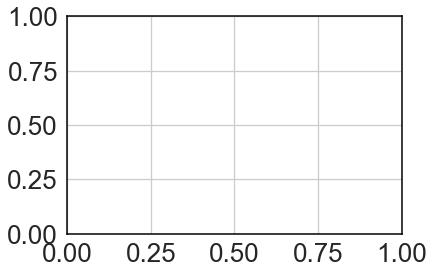

In [19]:
# ---------- plot
plt.xlim([0, magmax+2])
plt.ylim([-5, 30])

plt.plot(magmom, rslt_data['Energy'] - Emin, 'ob', ms=15, mew=1.5, alpha=0.5)

# ---------- title and label
plt.title('Random search for Y$_2$Co$_{17}$')
plt.xlabel('Magnetic moment ($\mu_\mathrm{B}$/cell)')
plt.ylabel('Energy (eV/cell)')

# ---------- save figure
#plt.savefig('Y2Co17_E_mag.png', bbox_inches='tight')    # PNG
#plt.savefig('Y2Co17_E_mag.png, bbox_inches='tight', dpi=300)    # PNG high dpi
#plt.savefig('Y2Co17_E_mag.pdf', bbox_inches='tight')    # PDF